# Analysis of Zillow economic data

The aim of this analysis is to make use of the Zillow economic dataset as provided under the following link:
https://www.kaggle.com/zillow/zecon

The data includes general price information on a city and time dimension and Zillows own indexes (Zillow Home Value Index) [https://www.zillow.com/research/zhvi-methodology-6032/]. The date range is from 1996 until 2018 on a monthly basis.

I want to create a easy scale that classifies any given region between 1 and 10 regarding house prices and show the historical change in value.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

## Data loading
Load in csv data. Since the dataset is large, a limit is used in general and taken out to create the visualizations or analysis.

In [3]:
city_crosswalk = pd.read_csv('cities_crosswalk.csv')
city_data = pd.read_csv('City_time_series.csv', nrows = 500000)

## Data overview and preparation

In [4]:
# The city_crosswalk data frame contains aditional information for each unique City ID
# It can be joined towards the main data
city_crosswalk.head()

,Unique_City_ID,City,County,State
0,oak_grovechristianky,Oak Grove,Christian,KY
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR
3,union_townshiperiepa,Union Township,Erie,PA
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI


In [5]:
city_data.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# Joining the two datasets on unique identifier and dropping the identifier once, since he would be in the data twice otherwise
df_joined = pd.merge(city_data, city_crosswalk, left_on='RegionName', right_on='Unique_City_ID', how='left')
df_joined.drop('Unique_City_ID', axis=1, inplace = True)
df_joined.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,City,County,State
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,108700.0,NaN,NaN,NaN,NaN,NaN,Abbottstown,Adams,PA
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,168400.0,NaN,NaN,NaN,NaN,NaN,Aberdeen,Bingham,ID
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN,Aberdeen,Harford,MD
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,74500.0,NaN,NaN,NaN,NaN,NaN,Aberdeen,Monroe,MS
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,131100.0,NaN,NaN,NaN,NaN,NaN,Aberdeen,Moore,NC


### Data distribution

In [7]:
# As a next step we want to know how many valid values we have in each column
for column in list(df_joined.columns.values):
    print(column + ": " + str(df_joined[column].count()))

Date: 500000
RegionName: 500000
InventorySeasonallyAdjusted_AllHomes: 0
InventoryRaw_AllHomes: 0
MedianListingPricePerSqft_1Bedroom: 0
MedianListingPricePerSqft_2Bedroom: 0
MedianListingPricePerSqft_3Bedroom: 0
MedianListingPricePerSqft_4Bedroom: 0
MedianListingPricePerSqft_5BedroomOrMore: 0
MedianListingPricePerSqft_AllHomes: 0
MedianListingPricePerSqft_CondoCoop: 0
MedianListingPricePerSqft_DuplexTriplex: 0
MedianListingPricePerSqft_SingleFamilyResidence: 0
MedianListingPrice_1Bedroom: 0
MedianListingPrice_2Bedroom: 0
MedianListingPrice_3Bedroom: 0
MedianListingPrice_4Bedroom: 0
MedianListingPrice_5BedroomOrMore: 0
MedianListingPrice_AllHomes: 0
MedianListingPrice_CondoCoop: 0
MedianListingPrice_DuplexTriplex: 0
MedianListingPrice_SingleFamilyResidence: 0
MedianPctOfPriceReduction_AllHomes: 0
MedianPctOfPriceReduction_CondoCoop: 0
MedianPctOfPriceReduction_SingleFamilyResidence: 0
MedianPriceCutDollar_AllHomes: 0
MedianPriceCutDollar_CondoCoop: 0
MedianPriceCutDollar_SingleFamilyResi

The nan- analysis shows that most columns are nearly empty, at least for the top columns (which are ordered by date in the original csv). Those columns only have values for the most recent months for most areas.

The columns containing the ZHVI indexes will be focus of the further analysis, since they include historical values.

C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\georg\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

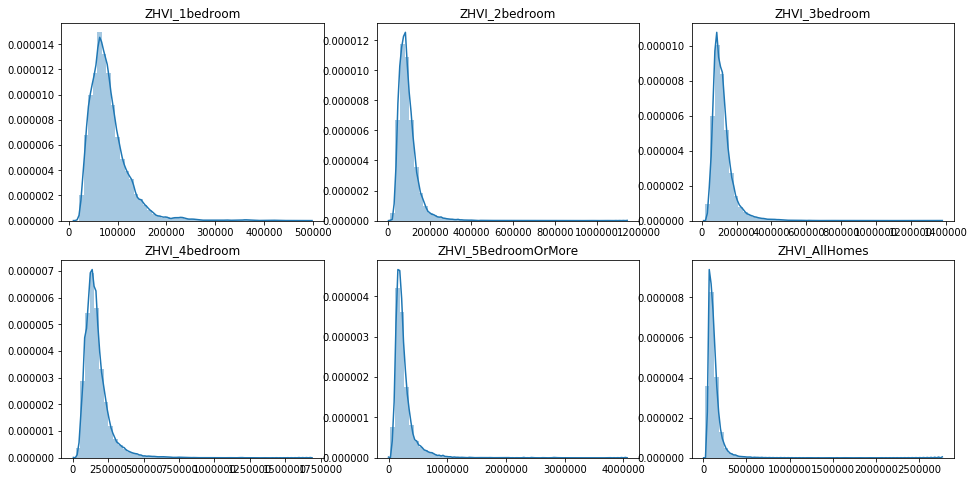

In [27]:
variables = ['ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes']

# fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
fig, ax = plt.subplots(figsize=(16,8), ncols=3, nrows=2)

for y in range(6):
    plotList = df_joined[variables[y]]
    plotList = list(plotList)
    plotList = [x for x in plotList if str(x) != 'nan']
    plotList.sort()
    ax[1 if y>2 else 0][y%3].set_title(variables[y])
    sns.distplot(plotList, ax=ax[1 if y>2 else 0][y%3])

The histograms show clearly that the data is centraly distributed.
To transform these distributions into a scale, we need to work with quantiles. This will ensure that the same amount of data points is in each scale point.

## Data Analysis
### Calculate scores

To calculate percentiles, we will work with numpy arrays.
The matrix scores will contain the tresholds for the six variables: ZHVI_1bedroom, ZHVI_2bedroom, ZHVI_3bedroom, ZHVI_4bedroom, ZHVI_5BedroomOrMore, ZHVI_AllHomes

In [22]:
scores = np.empty([6, 11])
index = 0

for x in variables:
    currentList = list(df_joined[x])
    currentList = [x for x in currentList if str(x) != 'nan']
    currentList.sort()
    a = np.array(currentList)
    for y in range(0, 11):
        scores[index][y] = np.percentile(currentList, (y*10))
    index = index + 1

The following function can be used to retrieve a score.

In [23]:
def scoreValue (value, column):
    '''Scores data against the scores array and returns the score.
    
    The scores array contains the tresholds to classify the data of the selected columns.
    
    Args:
        value: Value to be scored.
        column: Index of column.
        
    Returns:
        Returns the index (1-10).
    '''
    for x in range(0, 10):
        if(int(value) > scores[column][x] and int(value) < scores[column][x+1]):
            return x+1

### Analyze Pittsburgh

The scores matrix now contains the tresholds for the six variables, based on the percentiles. This can be used to calculate the score for an individual city.
We will do so for the city of Pittsburgh.

First, we select a subset of data for Pittsburgh:

In [31]:
selectedColumns = ['Date', 'RegionName', 'ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom',
                   'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'City', 'County', 'State']
df_joinedSelected = df_joined[selectedColumns]
df_Pittsburgh = df_joinedSelected.loc[df_joinedSelected['City'] == 'Pittsburgh']
df_Pittsburgh.head()

,Date,RegionName,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,City,County,State
7725,1996-04-30,pittsburghalleghenypa,NaN,39800.0,54500.0,NaN,NaN,52100.0,Pittsburgh,Allegheny,PA
19245,1996-05-31,pittsburghalleghenypa,NaN,39400.0,54100.0,NaN,NaN,51500.0,Pittsburgh,Allegheny,PA
30857,1996-06-30,pittsburghalleghenypa,NaN,39200.0,54200.0,NaN,NaN,51300.0,Pittsburgh,Allegheny,PA
42493,1996-07-31,pittsburghalleghenypa,NaN,38900.0,54300.0,NaN,NaN,51200.0,Pittsburgh,Allegheny,PA
54140,1996-08-31,pittsburghalleghenypa,NaN,38900.0,54300.0,NaN,NaN,51200.0,Pittsburgh,Allegheny,PA


In [26]:
latestValues = df_Pittsburgh[df_Pittsburgh['Date'] == df_Pittsburgh['Date'].max()]
index = 2;

print("Scores for Pittsburgh:")

for column in latestValues.columns[2:8]:
    if(latestValues[column].values != latestValues[column].values):
        print(column + ": " + "Missing value")
    else:
        print(column + ": " + str(scoreValue(latestValues[column], index-2)))
    index = index + 1

Scores for Pittsburgh:
ZHVI_1bedroom: 6
ZHVI_2bedroom: 4
ZHVI_3bedroom: 5
ZHVI_4bedroom: 6
ZHVI_5BedroomOrMore: 6
ZHVI_AllHomes: 5


Since the data has a date dimension, we can analyze the historical trend for the house prices in Pittsburgh. In order to make use of the Date information in the Date column, we need to transform this string into a datetime format.
Pandas has fast inbulid functionality for this.

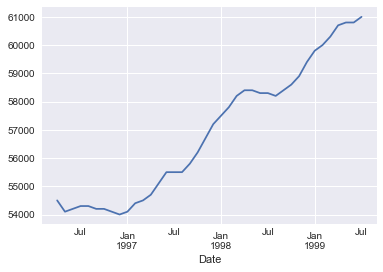

In [32]:
ts = pd.Series(np.array(df_Pittsburgh['ZHVI_3bedroom']), index = pd.to_datetime(df_Pittsburgh['Date'], infer_datetime_format=True))
sns.set()
ts.plot()